# **Model Prediksi Pelanggan Churn di Perusahaan Telekomunikasi**

## *1. Pemahaman Mengenai Permasalahan Bisnis*

**Latar Belakang** <br>
Sebuah perusahaan telekomunikasi tengah menghadapi tantangan strategis dalam memantau perilaku pelanggan yang cenderung beralih ke penyedia layanan telekomunikasi lain. Perpindahan pelanggan ke pesaing dapat berdampak negatif pada bisnis perusahaan ini karena akan mengurangi jumlah pelanggan mereka. Menghadapi situasi ini, perusahaan berencana untuk mengembangkan sebuah model machine learning yang dapat memprediksi kemungkinan pelanggan yang berpotensi beralih ke pesaing.
<br>

**Target Prediksi** <br>
Model machine learning yang akan dikembangkan untuk memprediksi kemungkinan pelanggan berpindah ke pesaing berdasarkan perilaku pelanggan. Dalam konteks target prediksi meliputi: <br>
0 : Pelanggan memilih untuk tetap menggunakan layanan perusahaan ini <br>
1 : Pelanggan memutuskan untuk berpindah dan menggunakan layanan yang disediakan oleh pesaing

**Pendekatan Analisis dan Pemodelan**<br>
Pada penyusunan model prediksi, akan dilakukan analisis terhadap data untuk mengidentifikasi pola-pola yang memisahkan antara pelanggan yang memilih untuk tetap menggunakan layanan dari perusahaan ini dengan pelanggan yang memilih untuk beralih ke pesaing.

Setelah proses analisis data selesai, akan dibangun sebuah model machine learning klasifikasi. Model ini akan membantu perusahaan dalam memprediksi peluang seorang pelanggan untuk beralih ke pesaing. Dengan demikian perusahaan dapat mengambil tindakan yang tepat untuk mempertahankan pelanggan dan meningkatkan retensi perusahaan.

**Metrics Evaluation**<br>
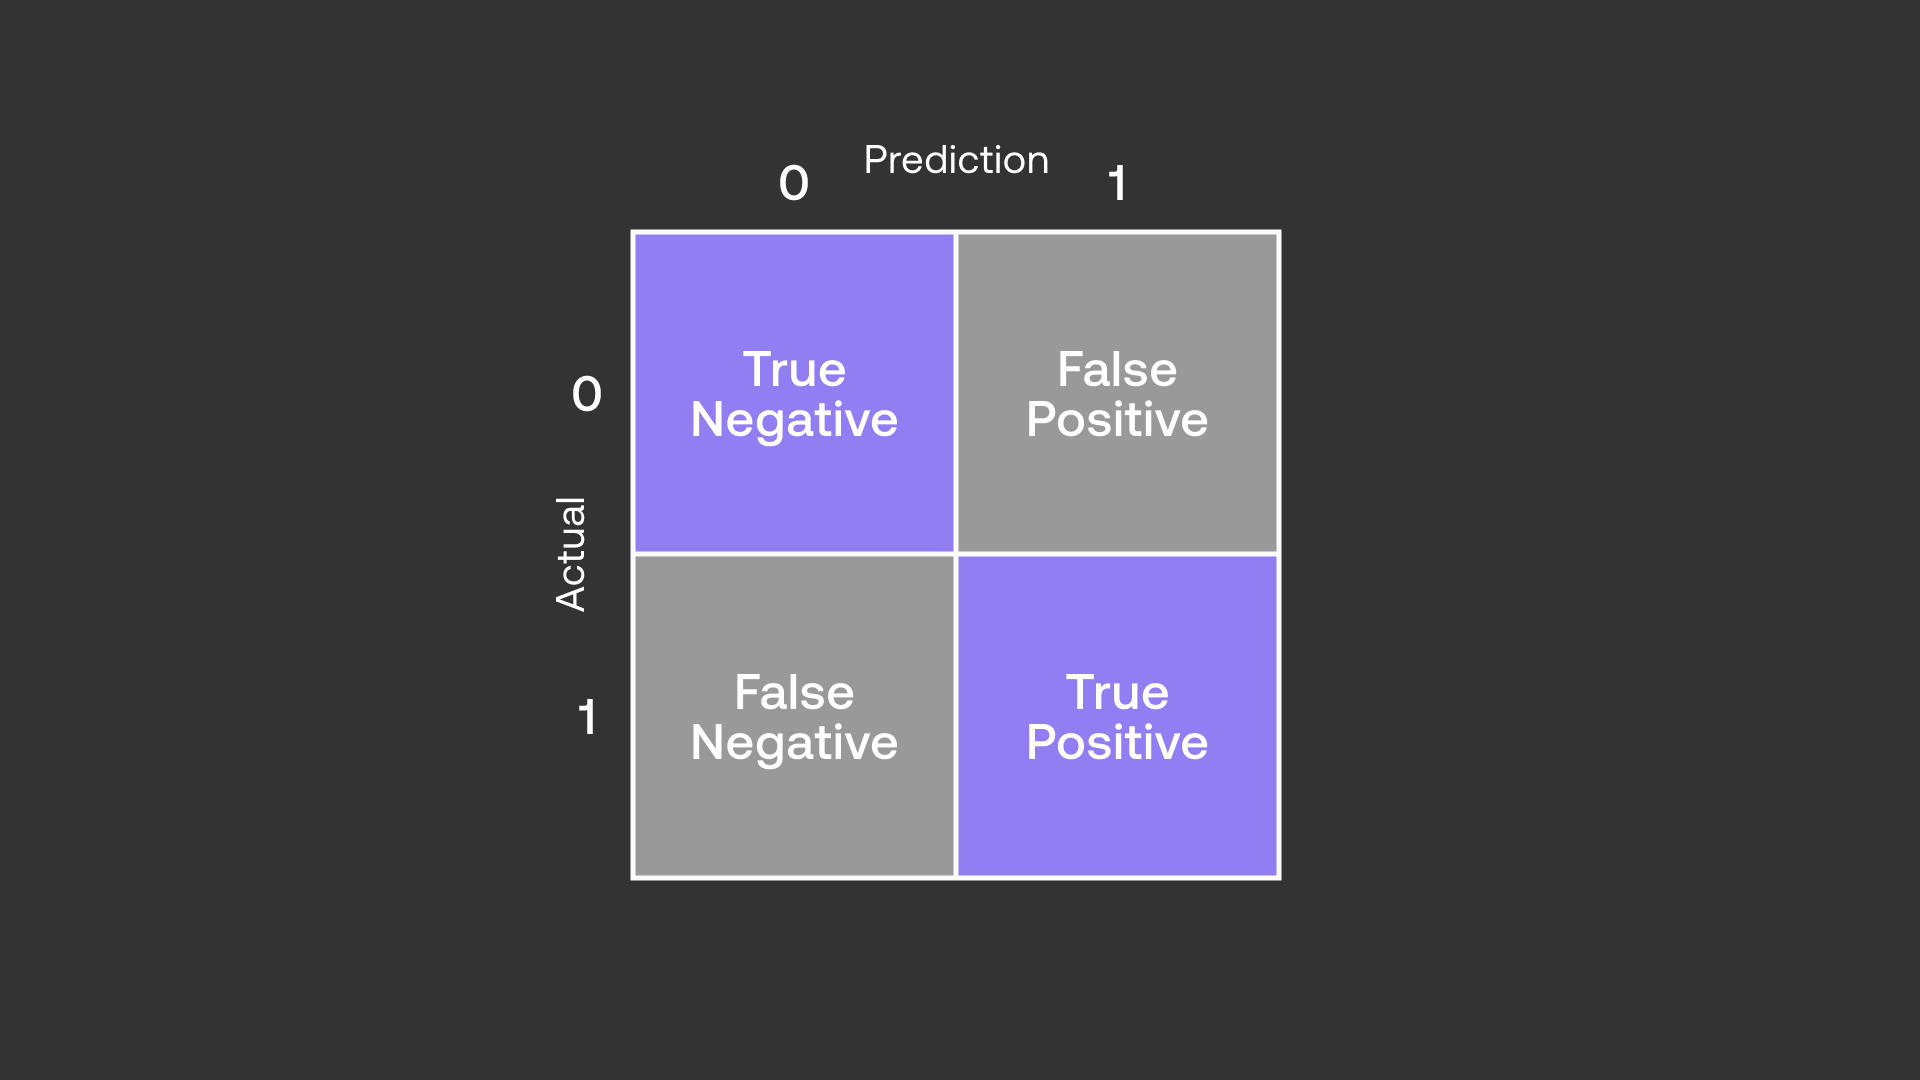

*False positive*<br>
Situasi dimana model memprediksi bahwa pelanggan akan beralih ke pesaing, namun pada kenyataannya pelanggan tetap menggunakan layanan perusahaan ini. Konsekuensinya adalah pengeluaran yang tidak perlu untuk promosi dan potensi mengurangi kepuasan pelanggan karena promosi yang mungkin tidak relevan atau mengganggu.

*False negative*<br>
Situasi dimana model memprediksi bahwa pelanggan tidak akan beralih ke pesaing, namun pada kenyataannya pelanggan memutuskan untuk beralih ke pesaing. Konsekuensinya adalah kehilangan pelanggan yang dapat mengurangi pendapatan perusahaan dan mengganggu pertumbuhan perusahaan dalam jangka panjang.

Dengan demikian, metric evaluation utama yang akan digunakan adalah **F2-Score**. Metric ini akan memerikan bobot yang lebih besar pada false negative dibandingkan false positive. Sesuai dengan kebutuhan perusahaan untuk mengurangi kehilangan pelanggan sambil tetap mempertahankan efisiensi biaya dan kepuasan pelanggan.

## *2. Import Library and Load Data*

In [1]:
#Import library yang digunakan

import pandas as pd
import numpy as np
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import fbeta_score,make_scorer,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import pickle

Dataset yang digunakan adalah: data_telco_customer_churn.csv

In [2]:
#Load dataset

data = pd.read_csv('data_telco_customer_churn.csv')
data

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


## *3. Pemahaman Mengenai Dataset yang Digunakan*

Dataset ini memuat beragam informasi terkait setiap pelanggan yang telah terdaftar. Dalam dataset ini, terdapat 11 kolom yang mengandung berbagai informasi yang relevan.

|Nama Kolom| Deskripsi|
|-----------|------|
|Dependents|Pelanggan memiliki tanggungan atau tidak|
|tenure|Jumlah bulan berlangganan|
|OnlineSecurity|Pelanggan berlangganan online security atau tidak <br>(yes, no, no internet service)|
|OnlineBackup|Pelanggan berlangganan online backup atau tidak <br>(yes, no, no internet service)|
|InternetService|Pelanggan berlangganan internet service atau tidak<br> (yes, no)|
|DeviceProtection|Pelanggan berlangganan device protection atau tidak <br>(yes, no, no internet service)|
|TechSupport|Pelanggan berlangganan tech support atau tidak<br>(yes, no, no internet service)|
|Contract|Tipe kontrak yang digunakan berdasarkan durasi<br>(month-to-month, two year, dan one year)|
|PaperlessBilling|Bentuk tagihan yang digunakan dalam bentuk paperless atau tidak <br>(yes, no)|
|MonthlyCharges|Jumlah tagihan setiap bulan|
|Churn|Pelanggan berpindah ke pesaing atau tidak <br>(yes, no)|

In [3]:
#Melihat detail masing-masing kolom berupa: 
# 1. nama kolom
# 2. jenis data
# 3. jumlah missing value
# 4. persentase missing value
# 5. jumlah unique value
# 6. sample unique value

summary = []
for column in data.columns:
    dtype = data[column].dtype
    null_count = data[column].isna().sum()
    null_percentage = round((null_count / len(data)) * 100,2)
    n_unique = data[column].nunique()
    unique = data[column].unique()
    
    summary.append({
        'dataFeature': column,
        'dataType': dtype,
        'null': null_count,
        'nullPct': null_percentage,
        'unique': n_unique,
        'uniqueSample': unique
    })
summary_final = pd.DataFrame(summary)
summary_final

,dataFeature,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


Berdasarkan informasi yang disampaikan pada tabel di atas, terlihat bahwa dalam dataset ini tidak terdapat missing value di seluruh kolom.

In [4]:
#Menampilkan deskripsi untuk data numerikal

data.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Pada dataset ini, terdapat dua kolom numerik, yaitu 'Tenure' dan 'MonthlyCharges'. Berdasarkan tabel di atas, kedua kolom ini memiliki rentang nilai yang tidak jauh, yaitu 'Tenure' berkisar antara 0 hingga 72 dan 'MonthlyCharges' berkisar antara 18,8 hingga 118,65.

Ketika rentang nilai kolom-kolom numerik tidak memiliki perbedaan yang jauh, penggunaan teknik scaling pada tahap preprocessing memang bersifat opsional. Namun meskipun opsional, disarankan untuk melakukan scaling terutama untuk algoritma machine learning yang sensitif terhadap skala data, seperti algoritma regresi dan k-nearest neighbors.

In [5]:
#Menampilkan deskripsi untuk data selain numerikal

data.describe(exclude=[np.number])

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Pada dataset ini, terdapat 9 kolom kategorikal yang memiliki unique values berkisar antara 2 hingga 3. Hal ini menunjukkan bahwa setiap kolom kategorikal tersebut memiliki 2 hingga 3 kategori yang berbeda.

## *4. Data Cleaning*

### *Memastikan Keberadaan Missing Value Menggunakan Karakter Lain*

Pada ringkasan sebelumnya tersampaikan bahwa tidak terdapat missing value berbentuk NaN dalam dataset ini. Namun perlu dilakukan pemeriksaan lebih lanjut untuk memastikan terdapat karakter lain seperti **'?', '-', '.', '999'** yang mungkin mewakili missing value.

In [6]:
#Memeriksa missing value menggunakan karakter lain

missing_value = ['?','-','.','999']
rows_with_missing_values = data[data.isin(missing_value).any(axis=1)]
rows_with_missing_values

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn


Setelah diperiksa, dapat dipastikan bahwa tidak terdapat missing value yang disimbolkan menggunakan karakter lain. Dengan demikian dapat disimpulkan bahwa dataset ini tidak mengandung missing value.

### *Mengubah Penulisan Dalam Dataset*

#### *Sensitivitas Huruf*

Seluruh data kategorikal dalam dataset ini akan diubah menjadi huruf kecil (lowercase) untuk menghindari sensitivitas huruf dan memudahkan penulisan kode pada langkah-langkah berikutnya.

In [7]:
#Mengubah text dalam dataset menjadi huruf kecil (lowercase)

data= data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,yes,9,no,no,dsl,yes,yes,month-to-month,yes,72.90,yes
1,no,14,no,yes,fiber optic,yes,no,month-to-month,yes,82.65,no
2,no,64,yes,no,dsl,yes,yes,two year,no,47.85,yes
3,no,72,yes,yes,dsl,yes,yes,two year,no,69.65,no
4,no,3,no internet service,no internet service,no,no internet service,no internet service,month-to-month,yes,23.60,no
...,...,...,...,...,...,...,...,...,...,...,...
4925,no,15,no,no,fiber optic,yes,yes,month-to-month,yes,103.45,no
4926,yes,10,no,no,fiber optic,yes,yes,month-to-month,yes,91.10,no
4927,no,58,no internet service,no internet service,no,no internet service,no internet service,two year,no,20.75,no
4928,no,1,no,no,fiber optic,no,no,month-to-month,yes,69.75,yes


#### *Mengubah Penulisan Pada Kolom 'Churn'*

Kolom 'Churn' akan dijadikan target untuk pembuatan model, sehingga kategori yang ada dalam kolom tersebut akan diubah menjadi nilai numerik.<br>

|Penulisan|Deskripsi|
|---|---|
|0|Pelanggan memilih untuk tetap menggunakan layanan perusahaan ini (churn = no)|
|1|Pelanggan memutuskan untuk berpindah dan menggunakan layanan yang disediakan oleh pesaing (churn = yes)|

In [8]:
#Mengubah 'yes' menjadi 1 dan 'no' menjadi 0 pada kolom 'Churn'

data['Churn'] = np.where(data['Churn']=='yes',1,0)
data

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,yes,9,no,no,dsl,yes,yes,month-to-month,yes,72.90,1
1,no,14,no,yes,fiber optic,yes,no,month-to-month,yes,82.65,0
2,no,64,yes,no,dsl,yes,yes,two year,no,47.85,1
3,no,72,yes,yes,dsl,yes,yes,two year,no,69.65,0
4,no,3,no internet service,no internet service,no,no internet service,no internet service,month-to-month,yes,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,no,15,no,no,fiber optic,yes,yes,month-to-month,yes,103.45,0
4926,yes,10,no,no,fiber optic,yes,yes,month-to-month,yes,91.10,0
4927,no,58,no internet service,no internet service,no,no internet service,no internet service,two year,no,20.75,0
4928,no,1,no,no,fiber optic,no,no,month-to-month,yes,69.75,1


#### *Mengubah Penulisan Kolom 'tenure' Menjadi 'Tenure'*

Penulisan kolom 'tenure' tidak konsisten dengan kolom lainnya, yaitu dimulai dengan huruf kapital. Perbaikan ini hanya bersifat perbaikan kecil.

In [9]:
#Mengganti nama kolom 'tenure' menjadi 'Tenure'

data.rename(columns={'tenure': 'Tenure'}, inplace=True)
data

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,yes,9,no,no,dsl,yes,yes,month-to-month,yes,72.90,1
1,no,14,no,yes,fiber optic,yes,no,month-to-month,yes,82.65,0
2,no,64,yes,no,dsl,yes,yes,two year,no,47.85,1
3,no,72,yes,yes,dsl,yes,yes,two year,no,69.65,0
4,no,3,no internet service,no internet service,no,no internet service,no internet service,month-to-month,yes,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,no,15,no,no,fiber optic,yes,yes,month-to-month,yes,103.45,0
4926,yes,10,no,no,fiber optic,yes,yes,month-to-month,yes,91.10,0
4927,no,58,no internet service,no internet service,no,no internet service,no internet service,two year,no,20.75,0
4928,no,1,no,no,fiber optic,no,no,month-to-month,yes,69.75,1


## *5. Exploratory Data Analysis (EDA)*

### *Memeriksa Distribusi Data dan Outliers*

Langkah selanjutnya adalah memeriksa data numerik yang berfokus pada identfikasi keberadaan outliers dan distribusi datanya.

#### *Distribusi data*

In [11]:
#nama kolom yang akan diuji
kolom_uji = ['Tenure','MonthlyCharges']

#List kosong untuk menaruh hasil uji distribusi setiap kolom
list = []

#Melakukan looping uji normalitas untuk setiap kolom yang sudah ditaruh dalam list kolom_uji
for i in kolom_uji : 
    sp,pvalue = shapiro(data[i])
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')
print(f'\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,Tenure,0.0,berdistribusi tidak normal
1,MonthlyCharges,0.0,berdistribusi tidak normal


Berdasarkan uji normalitas yang telah dilakukan menunjukkan bahwa data-data pada kolom 'tenure' dan 'MonthlyCharges' **berdistribusi tidak normal**

#### *Pemeriksaan outliers*

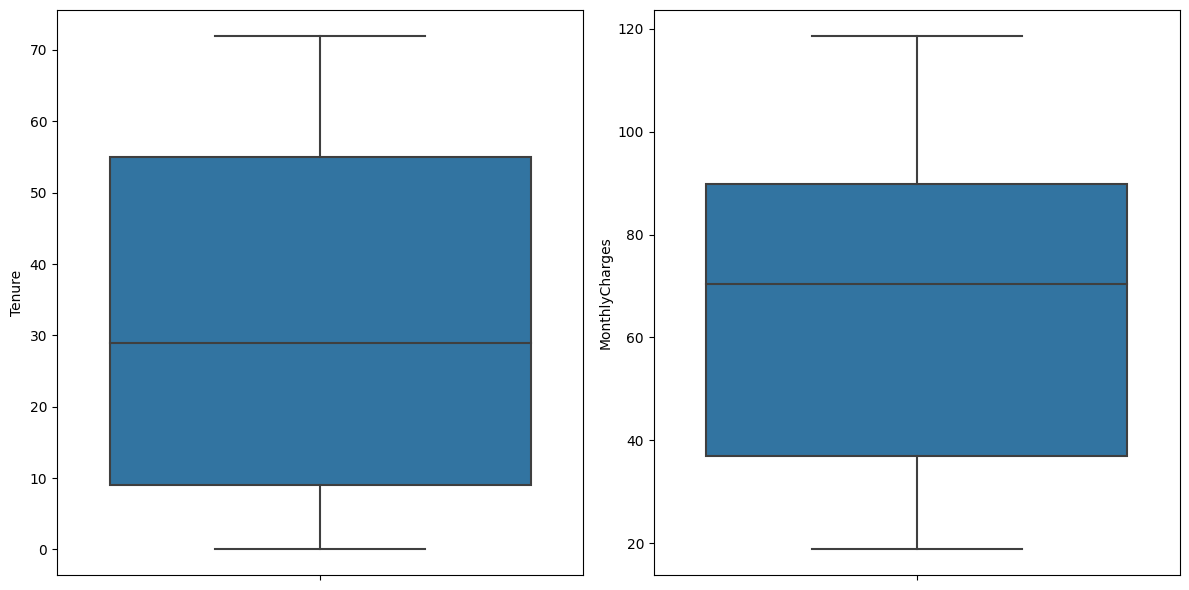

In [12]:
#Membuat kanvas grafik
plt.figure(figsize=(12,6))

#nama kolom yang akan diperiksa outliernya
kolom_outlier = ['Tenure','MonthlyCharges']

#Melakukan looping boxplot untuk setiap kolom yang sudah ditaruh dalam list kolom_outlier
for i in range(0, len(kolom_outlier)):
    plt.subplot(1, len(kolom_outlier), i+1)
    sns.boxplot(y=data[kolom_outlier[i]])
    plt.tight_layout()

Pada boxplot di atas menunjukkan bahwa data-data pada kolom 'Tenure' dan 'MonthlyCharges' **tidak mengandung outliers**.

### *Proporsi Churn*

In [45]:
#Membuat variabel 'total_churn' untuk menghitung jumlah pelanggan berdasarkan churn atau tidak churn
total_churn = data[['Churn','Dependents']].groupby('Churn').count().reset_index()

#Menambahkan kolom untuk menghitung dan persentasenya
total_churn['Persentase'] = round(total_churn['Dependents']/total_churn['Dependents'].sum()*100,0)

#Mengganti nama kolom yang ada di variabel 'total_churn'
total_churn.rename(columns={'Dependents': 'Total Pelanggan'}, inplace=True)

#Menampilkan variabel 'property_review'
total_churn

,Churn,Total Pelanggan,Persentase
0,0,3614,73.0
1,1,1316,27.0


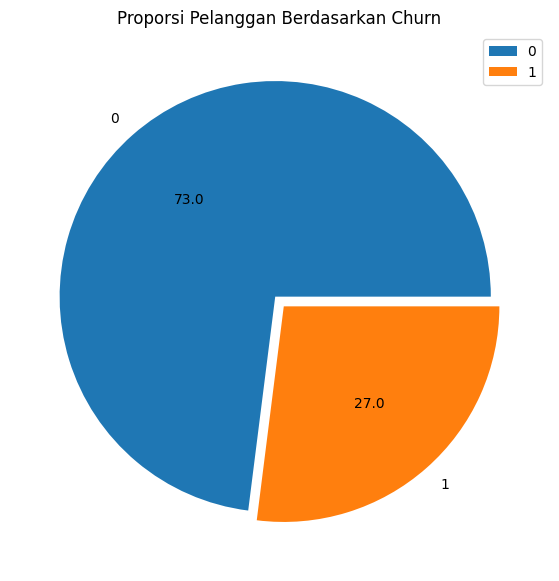

In [46]:
#Membuat canvas grafik
plt.figure(figsize=(10,7))

#Membuat grafik pie
plt.pie( 
    x = total_churn['Persentase'], #value yang akan dimasukkan ke dalam pie chart
    labels = total_churn['Churn'], #kolom yang dijadikan patokan untuk pengkategorian di pie chart
    autopct = f'%.1f', #untuk menuliskan label masing-masing persentase
    explode = (0.03,0.03) #untuk membuat jarak masing-masing slice. Ditulis sebanyak jumlah slice
)

#Menambahkan judul grafik
plt.title('Proporsi Pelanggan Berdasarkan Churn')

#Menambahkan legenda
plt.legend()

#Menampilkan grafik
plt.show()

Berdasarkan informasi di atas, terdapat ketidakseimbangan proporsi antara kategori 'no' dan 'yes', dengan 'no' mendominasi. Ini menunjukkan bahwa jumlah pelanggan yang memilih tidak beralih ke pesaing jauh lebih besar dibandingkan yang sebaliknya.

Meskipun kategori 'no' mendominasi, namun tidak dapat diabaikan bahwa terdapat 27% pelanggan yang memilih untuk beralih ke pesaing.

### *Hubungan Antara Churn Dengan Seluruh Layanan*

Dalam dataset ini, kolom 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', dan 'TechSupport' mencerminkan layanan yang ditawarkan oleh perusahaan telekomunikasi. Diperlukan visualisasi jumlah pelanggan berdasarkan jenis layanan yang digunakan beserta hubungannya terhadap keputusan pelanggan untuk tetap memilih layanan di perusahaan ini atau sebaliknya.

In [13]:
#Membuat variabel 'churn_rate' untuk menghitung jumlah pelanggan berdasarkan masing-masing jenis layanan terhadap keputusan churn atau tidak
churn_rate = data[['Churn','Dependents','OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','TechSupport']].groupby(['OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','TechSupport','Churn']).count().reset_index().sort_values(by='Dependents',ascending=False)

#Menambahkan kolom untuk menghitung dan persentasenya
churn_rate['Persentase'] = round(churn_rate['Dependents']/churn_rate['Dependents'].sum()*100,0)

#Mengganti nama kolom yang ada di variabel 'churn_rate'
churn_rate.rename(columns={'Dependents':'Total Pelanggan'}, inplace=True)

#Menampilkan variabel 'churn_rate'
churn_rate

,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Churn,Total Pelanggan,Persentase
32,no internet service,no internet service,no,no internet service,no internet service,0,970,20.0
9,no,no,fiber optic,no,no,1,387,8.0
8,no,no,fiber optic,no,no,0,226,5.0
56,yes,yes,dsl,yes,yes,0,188,4.0
0,no,no,dsl,no,no,0,164,3.0
...,...,...,...,...,...,...,...,...
45,yes,no,fiber optic,no,yes,1,7,0.0
39,yes,no,dsl,yes,no,1,7,0.0
57,yes,yes,dsl,yes,yes,1,6,0.0
55,yes,yes,dsl,yes,no,1,5,0.0


Berdasarkan informasi di atas, sebanyak 970 pelanggan (20% dari total keseluruhan) dengan kondisi tidak berlangganan internet service dan seluruh service lainnya dalam kategori 'no internet service memilih untuk tetap menggunakan layanan dari perusahaan ini. Hal ini menunjukkan bahwa terdapat indikasi bahwa layanan online security, online backup, device protection, dan tech support adalah layanan tambahan dari layanan internet service, yaitu layanan-layanan tersebut hanya tersedia untuk pelanggan yang berlangganan internet service.

Penggunaan layanan-layanan tambahan ini bersifat opsional dan dapat dipilih oleh pelanggan yang menggunakan layanan internet service (fiber optic atau dsl).

Untuk mengkonfirmasi indikasi tersebut, maka akan diperiksa lebih lanjut. Akan dilihat apakah pelanggan yang tidak berlangganan internet service (InternetService = 'no') juga memilih untuk berlangganan layanan tambahan tersebut atau sebaliknya (dalam layanan tambahan akan ditandai dengan 'yes' atau 'no').

In [14]:
#Memeriksa pada layanan device protection

internet = ['no'] #Untuk menentukan pelanggan yang tidak berlangganan internet service
device = ['yes','no'] #Pelanggan berlangganan layanan device protection atau sebaliknya
filtered_data = [] #List kosong untuk menaruh hasil temuan

#Melakukan loop untuk setiap data dalam variabel 'internet' dan variabel 'device'
for i in internet:
    for j in device:
        filtered_subset = data[(data['InternetService'] == i) & (data['DeviceProtection'] == j)]
        filtered_data.append(filtered_subset)
filtered_result = pd.concat(filtered_data,ignore_index=True)
filtered_result

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn


In [15]:
#Memeriksa pada layanan online backup

internet = ['no'] #Untuk menentukan pelanggan yang tidak berlangganan internet service
backup = ['yes','no'] #Pelanggan berlangganan layanan online backup atau sebaliknya
filtered_data = [] #List kosong untuk menaruh hasil temuan

#Melakukan loop untuk setiap data dalam variabel 'internet' dan variabel 'backup'
for i in internet:
    for j in backup:
        filtered_subset = data[(data['InternetService'] == i) & (data['OnlineBackup'] == j)]
        filtered_data.append(filtered_subset)
filtered_result = pd.concat(filtered_data,ignore_index=True)
filtered_result

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn


In [16]:
#Memeriksa pada layanan online security

internet = ['no'] #Untuk menentukan pelanggan yang tidak berlangganan internet service
security = ['yes','no'] #Pelanggan berlangganan layanan online security atau sebaliknya
filtered_data = [] #List kosong untuk menaruh hasil temuan

#Melakukan loop untuk setiap data dalam variabel 'internet' dan variabel 'security'
for i in internet:
    for j in security:
        filtered_subset = data[(data['InternetService'] == i) & (data['OnlineSecurity'] == j)]
        filtered_data.append(filtered_subset)
filtered_result = pd.concat(filtered_data,ignore_index=True)
filtered_result

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn


In [17]:
#Memeriksa pada layanan tech support

internet = ['no'] #Untuk menentukan pelanggan yang tidak berlangganan internet service
tech = ['yes','no'] #Pelanggan berlangganan layanan tech support atau sebaliknya
filtered_data = []

for i in internet:
    for j in tech:
        filtered_subset = data[(data['InternetService'] == i) & (data['TechSupport'] == j)]
        filtered_data.append(filtered_subset)
filtered_result = pd.concat(filtered_data,ignore_index=True)
filtered_result

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn


Hasil pemeriksaan lanjutan yang telah dilakukan dapat mengkonfirmasi indikasi yang disebutkan sebelumnya. Tidak ada temuan pada seluruh hasil pemeriksaan pada layanan-layanan tersebut.

### *Hubungan Antara Churn Dengan Durasi Berlangganan*

In [18]:
#Membuat variabel 'churn_rate' untuk menghitung jumlah pelanggan berdasarkan durasi berlangganannya terhadap keputusan churn atau tidak
churn_rate = data[['Churn','Dependents','Tenure']].groupby(['Tenure','Churn']).count().reset_index().sort_values(by='Dependents',ascending=False)

#Menambahkan kolom untuk menghitung dan persentasenya
churn_rate['Persentase'] = round(churn_rate['Dependents']/churn_rate['Dependents'].sum()*100,0)

#Mengganti nama kolom yang ada di variabel 'churn_rate'
churn_rate.rename(columns={'Dependents':'Total Pelanggan'}, inplace=True)

#Menampilkan variabel 'churn_rate'
churn_rate

,Tenure,Churn,Total Pelanggan,Persentase
2,1,1,276,6.0
143,72,0,247,5.0
1,1,0,157,3.0
141,71,0,115,2.0
4,2,1,83,2.0
...,...,...,...,...
128,64,1,3,0.0
124,62,1,3,0.0
144,72,1,3,0.0
126,63,1,2,0.0


Berdasarkan informasi di atas, sebanyak 276 pelanggan (6% dari total keseluruhan) yang baru berlangganan selama satu bulan memutuskan untuk beralih ke pesaing. Hal ini menandakan bahwa pelanggan yang baru berlangganan selama satu bulan memiliki kecenderungan yang tinggi untuk berpindah ke penyedia layanan pesaing.

### *Hubungan Antara Churn Dengan Jenis Bill*

In [19]:
#Membuat variabel 'churn_rate' untuk menghitung jumlah pelanggan berdasarkan jenis billnya terhadap keputusan churn atau tidak
churn_rate = data[['Churn','Dependents','PaperlessBilling']].groupby(['PaperlessBilling','Churn']).count().reset_index().sort_values(by='Dependents',ascending=False)

#Menambahkan kolom untuk menghitung dan persentasenya
churn_rate['Persentase'] = round(churn_rate['Dependents']/churn_rate['Dependents'].sum()*100,0)

#Mengganti nama kolom yang ada di variabel 'churn_rate'
churn_rate.rename(columns={'Dependents':'Total Pelanggan'}, inplace=True)

#Menampilkan variabel 'churn_rate'
churn_rate

,PaperlessBilling,Churn,Total Pelanggan,Persentase
2,yes,0,1966,40.0
0,no,0,1648,33.0
3,yes,1,991,20.0
1,no,1,325,7.0


Tabel di atas menunjukkan bahwa pelanggan yang memilih penagihan tanpa kertas (PaperlessBilling = 'yes') maupun yang menggunakan penagihan dengan kertas (PaperlessBilling = 'no') cenderung lebih memilih untuk bertahan sebagai pelanggan.

Dalam analisis deskriptif, tidak terlihat pengaruh jenis penagihan terhadap keputusan pelanggan untuk beralih ke pesaing atau tetap setia. Namun, hal ini akan dipastikan lebih lanjut menggunakan pendekatan uji statistik chi-square.

In [20]:
#Membuat crosstabulate antara kolom 'Churn' dengan kolom 'PaperlessBilling'
contingency_table = pd.crosstab(data['Churn'], data['PaperlessBilling'])

#Uji chi-square berdasarkan crosstabulate yang sudah dibuat
res = chi2_contingency(contingency_table)

#hasil yang diambil adalah pvalue
res.pvalue

print("Jika p-value < 0,05 maka terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'PaperlessBilling'")
print("Jika p-value > 0,05 maka tidak terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'PaperlessBilling'")
print(f'\n')
print('Hasil uji chi-square adalah:')

#Conditional statement untuk menampikan hasil dari uji chi-square
if res.pvalue < 0.05:
    print("Terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'PaperlessBilling'")
else:
    print("Tidak terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'PaperlessBilling'")

Jika p-value < 0,05 maka terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'PaperlessBilling'
Jika p-value > 0,05 maka tidak terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'PaperlessBilling'


Hasil uji chi-square adalah:
Terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'PaperlessBilling'


Hasil uji statistik menunjukkan hasil sebaliknya. Dengan kata lain, penggunaan uji statistik membantu mengungkapkan hubungan yang mungkin tidak terlihat dalam analisis deskriptif yaitu mengungkapkan temuan bahwa terdapat korelasi antara keputusan pelanggan untuk beralih dan apakah mereka menggunakan penagihan tanpa kertas atau tidak.

### *Hubungan Antara Churn Dengan Dependents*

In [21]:
#Membuat variabel 'churn_rate' untuk menghitung jumlah pelanggan berdasarkan kondisi tanggungannya terhadap keputusan churn atau tidak
churn_rate = data[['Churn','Dependents','PaperlessBilling']].groupby(['Dependents','Churn']).count().reset_index().sort_values(by='PaperlessBilling',ascending=False)

#Menambahkan kolom untuk menghitung dan persentasenya
churn_rate['Persentase'] = round(churn_rate['PaperlessBilling']/churn_rate['PaperlessBilling'].sum()*100,0)

#Mengganti nama kolom yang ada di variabel 'churn_rate'
churn_rate.rename(columns={'PaperlessBilling':'Total Pelanggan'}, inplace=True)

#Menampilkan variabel 'churn_rate'
churn_rate

,Dependents,Churn,Total Pelanggan,Persentase
0,no,0,2355,48.0
2,yes,0,1259,26.0
1,no,1,1091,22.0
3,yes,1,225,5.0


Tabel di atas menunjukkan bahwa pelanggan yang memiliki tanggungan (Dependents = 'yes') maupun yang tidak memiliki tanggungan (Dependents = 'no') cenderung lebih memilih untuk bertahan sebagai pelanggan.

Dalam analisis deskriptif, tidak terlihat pengaruh kondisi tanggungan terhadap keputusan pelanggan untuk beralih ke pesaing atau tetap setia. Namun, hal ini akan dipastikan lebih lanjut menggunakan pendekatan uji statistik chi-square.

In [22]:
#Membuat crosstabulate antara kolom 'Churn' dengan kolom 'PaperlessBilling'
contingency_table = pd.crosstab(data['Churn'], data['Dependents'])

#Uji chi-square berdasarkan crosstabulate yang sudah dibuat
res = chi2_contingency(contingency_table)

#hasil yang diambil adalah pvalue
res.pvalue

print("Jika p-value < 0,05 maka terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'Dependents'")
print("Jika p-value > 0,05 maka tidak terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'Dependents'")
print(f'\n')
print('Hasil uji chi-square adalah:')

#Conditional statement untuk menampikan hasil dari uji chi-square
if res.pvalue < 0.05:
    print("Terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'Dependents'")
else:
    print("Tidak terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'Dependents'")

Jika p-value < 0,05 maka terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'Dependents'
Jika p-value > 0,05 maka tidak terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'Dependents'


Hasil uji chi-square adalah:
Terdapat hubungan signifikan antara kolom 'Churn' dengan kolom 'Dependents'


Hasil uji statistik menunjukkan hasil sebaliknya. Dengan kata lain, penggunaan uji statistik membantu mengungkapkan hubungan yang mungkin tidak terlihat dalam analisis deskriptif yaitu mengungkapkan temuan bahwa terdapat korelasi antara keputusan pelanggan untuk beralih dan apakah mereka memiliki tanggungan atau tidak.

### *Hubungan Antara Churn Dengan Jenis Kontrak*

In [23]:
#Membuat variabel 'churn_rate' untuk menghitung jumlah pelanggan berdasarkan jenis kontraknya terhadap keputusan churn atau tidak
churn_rate = data[['Churn','Dependents','Contract']].groupby(['Contract','Churn']).count().reset_index().sort_values(by='Dependents',ascending=False)

#Menambahkan kolom untuk menghitung dan persentasenya
churn_rate['Persentase'] = round(churn_rate['Dependents']/churn_rate['Dependents'].sum()*100,0)

#Mengganti nama kolom yang ada di variabel 'churn_rate'
churn_rate.rename(columns={'Dependents':'Total Pelanggan'}, inplace=True)

#Menampilkan variabel 'churn_rate'
churn_rate

,Contract,Churn,Total Pelanggan,Persentase
0,month-to-month,0,1543,31.0
1,month-to-month,1,1178,24.0
4,two year,0,1125,23.0
2,one year,0,946,19.0
3,one year,1,106,2.0
5,two year,1,32,1.0


Berdasarkan tabel di atas, terlihat bahwa pelanggan dengan jenis kontrak bulanan (month-to-month) memiliki tingkat kecenderungan beralih (churn) yang lebih tinggi. Perbedaan persentase antara pelanggan yang beralih dan yang tidak hanya sekitar 7%. Sementara itu pelanggan dengan kontrak tahunan dan dua tahunan cenderung lebih memilih untuk tetap menggunakan layanan di perusahaan telekomunikasi ini, yaitu dengan perbedaan persentase sekitar 17% untuk kontrak tahunan dan 22% untuk kontrak dua tahunan.

## *6. Penyusunan Algoritma Model Machine Learning*

### *Menyusun Skema Pipeline Untuk Tahap Preprocessing*

Pada tahap preprocessing akan ada dua pendekatan yang digunakan:

1. Seluruh feature kategorikal akan diubah menggunakan metode one hot encoding, sedangkan feature numerikal akan dinormalisasi menggunakan metode robust scaling.<br>
2. Seluruh feature kategorikal akan diubah menggunakan metode one hot encoding, namun feature numerikal tidak dinormalisasi .

In [10]:
#Skema preprocessing 1 (menggunakan scaling)

transform1 = ColumnTransformer([
    ('OHE',OneHotEncoder(),['OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract','Dependents','PaperlessBilling']),
    ('Scale',RobustScaler(),['Tenure','MonthlyCharges'])
],remainder='passthrough')
transform1

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(),
                                 ['OnlineSecurity', 'OnlineBackup',
                                  'InternetService', 'DeviceProtection',
                                  'TechSupport', 'Contract', 'Dependents',
                                  'PaperlessBilling']),
                                ('Scale', RobustScaler(),
                                 ['Tenure', 'MonthlyCharges'])])

In [11]:
#Skema preprocessing 2 (tanpa scaling)

transform2 = ColumnTransformer([
    ('OHE',OneHotEncoder(),['OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract','Dependents','PaperlessBilling'])
],remainder='passthrough')
transform2

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(),
                                 ['OnlineSecurity', 'OnlineBackup',
                                  'InternetService', 'DeviceProtection',
                                  'TechSupport', 'Contract', 'Dependents',
                                  'PaperlessBilling'])])

### *Memisahkan Data Train dan Data Test*

Data akan dipisahkan menjadi dua bagian, yaitu 80% digunakan untuk data train dan 20% sisanya untuk data test.

In [13]:
#Tahap pemisahan data train dan data test (train test split)

x = data.drop('Churn',axis=1) #memilih feature
y = data['Churn'] #memilih target

xtrain, xtest, ytrain, ytest = train_test_split(
    x, 
    y, 
    test_size = 0.2, #proporsi data test
    random_state= 2023, #mengunci generator random agar sama terus
    stratify= y) #untuk menyamakan proporsi (perbandingan) pada train data dan test data masing-masing kategori yang ada di dalam target

### *Mengecek Balancing Pada Kolom Target*

Sudah diidentifikasi sebelumnya bahwa terdapat ketidakseimbangan antara pelanggan yang memilih tidak beralih ke pesaing dengan pelanggan yang memutuskan untuk beralih ke pesaing dengan perbandingan 73:27.

Untuk mengatasi ketidakseimbangan tersebut, maka dapat digunakan teknik resampling, yaitu random under sampling, near miss, dan random over sampling.

### *Pemilihan Model Terbaik*

Algoritma model yang akan digunakan adalah:
- Logistic Regression
- Decision Tree Classifier
- K-Neighbors Classifier
- Support Vector Machine
- Xgboost Classifier
- Adaboost Classifier
- Random Forest
- Hard Voting Classifier
- Stacking Classifier menggunakan meta learner Logistic Regression
- Stacking Classifier menggunakan meta learner Decision Tree Classifier
- Stacking Classifier menggunakan meta learner K-Neighbors Classifier
- Stacking Classifier menggunakan meta learner Support Vector Machine


Pada penentuan model terbaik akan digunakan 4 skema yaitu:
- Seluruh feature kategorikal akan diubah menggunakan teknik one hot encoding, feature numerikal akan dinormalisasi menggunakan metode robust scaling, dan dilakukan metode resampling untuk menyeimbangkan proporsi kategori dalam kolom target.
- Seluruh feature kategorikal akan diubah menggunakan teknik one hot encoding, feature numerikal akan dinormalisasi menggunakan metode robust scaling, namun tidak dilakukan metode resampling.
- Seluruh feature kategorikal akan diubah menggunakan teknik one hot encoding dan dilakukan metode resampling untuk menyeimbangkan proporsi kategori dalam kolom target, namun feature numerikal tidak dinormalisasi.
- Seluruh feature kategorikal akan diubah menggunakan teknik one hot encoding namun feature numerikal tidak dinormalisasi serta tidak dilakukan metode resampling.

Setelah dilakukan seluruh skema tersebut selanjutnya akan dipilih 3 model terbaik berdasarkan F2 score nya.

#### *Menggunakan Pipeline Scaling (Transform1)*

In [27]:
#Skema 1 (menggunakan one hot encoder, robust scaler, dan resampling)

#Menuliskan algoritma model yang digunakan
logreg = LogisticRegression(random_state=2023)
tree = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier()
svm = SVC(random_state=2023)
xgb = XGBClassifier()
adb = AdaBoostClassifier(random_state=2023)
rf = RandomForestClassifier(random_state=2023)

vc_hard = VotingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],voting='hard')

sc_logreg = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=LogisticRegression(random_state=2023))

sc_tree = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=DecisionTreeClassifier(random_state=2023))

sc_knn = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=KNeighborsClassifier())

sc_svm = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=SVC(random_state=2023))

#Menuliskan metode resampling yang digunakan
ros = RandomOverSampler()
nm = NearMiss()
rus = RandomUnderSampler()

model = [logreg,tree,knn,svm,xgb,adb,rf,vc_hard,sc_logreg,sc_tree,sc_knn,sc_svm] #List untuk menampung seluruh variabel algoritma model
resamp = [ros,nm,rus] #List untuk menampung seluruh variabel resampling
f2_score =[] #List kosong untuk menampung hasil f2 score
std = [] #List kosong untuk menampung hasil standar deviasi

#Melakukan looping untuk setiap model dan setiap resampling menggunakan skema preprocessing 1
for i in model:
    for j in resamp:
        model_pipe = Pipeline([
            ('Preprocess',transform1),
            ('imba',j),
            ('clf',i)
        ])
        pipe_cv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=make_scorer(fbeta_score, beta=2)) #Cross validation
        f2_score.append(pipe_cv.mean()) #Memasukkan f2 score rata-rata dari cross validation
        std.append(pipe_cv.std()) #Memasukkan nilai standar deviasi dari cross validation

#Membuat data frame untuk menampilkan hasil permodelan yang sudah dilakukan dan diurutkan dari f2 score yang terbesar
pd.DataFrame({
    'Model': ['Logistic Regression ROS','Logistic Regression Near Miss','Logistic Regression RUS',
              'DT ROS','DT Near Miss','DT RUS',
              'KNN ROS','KNN Near Miss','KNN RUS',
              'SVC ROS','SVC Near Miss','SVC RUS',
              'XGBoost ROS','XGBoost Near Miss','XGBoost RUS',
              'AdaBoost Classifier ROS','AdaBoost Classifier Near Miss','AdaBoost Classifier RUS',
              'Random Forest ROS','Random Forest Near Miss','Random Forest RUS',
              'Voting Classifier Hard ROS','Voting Classifier Hard Near Miss','Voting Classifier Hard RUS',
              'Stacking Classifier Logreg ROS','Stacking Classifier Logreg Near Miss','Stacking Classifier Logreg RUS',
              'Stacking Classifier Tree ROS','Stacking Classifier Tree Near Miss','Stacking Classifier Tree RUS',
              'Stacking Classifier KNN ROS','Stacking Classifier KNN Near Miss','Stacking Classifier KNN RUS',
              'Stacking Classifier SVM ROS','Stacking Classifier SVM Near Miss','Stacking Classifier SVM RUS'
              ],
    'F2 Score Mean' : f2_score,
    'F2 Score Std' : std
}).sort_values('F2 Score Mean', ascending=False)

,Model,F2 Score Mean,F2 Score Std
15,AdaBoost Classifier ROS,0.723387,0.016090
23,Voting Classifier Hard RUS,0.722510,0.011012
17,AdaBoost Classifier RUS,0.722447,0.014066
2,Logistic Regression RUS,0.721065,0.010573
0,Logistic Regression ROS,0.720297,0.006358
26,Stacking Classifier Logreg RUS,0.717122,0.008479
11,SVC RUS,0.715587,0.011818
35,Stacking Classifier SVM RUS,0.713430,0.004746
9,SVC ROS,0.712882,0.025795
14,XGBoost RUS,0.697571,0.014066


In [28]:
#Skema 2 (menggunakan one hot encoder, robust scaler, tanpa resampling)

#Menuliskan algoritma model yang digunakan
logreg = LogisticRegression(random_state=2023)
tree = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier()
svm = SVC(random_state=2023)
xgb = XGBClassifier()
adb = AdaBoostClassifier(random_state=2023)
rf = RandomForestClassifier(random_state=2023)

vc_hard = VotingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],voting='hard')

sc_logreg = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=LogisticRegression(random_state=2023))

sc_tree = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=DecisionTreeClassifier(random_state=2023))

sc_knn = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=KNeighborsClassifier())

sc_svm = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=SVC(random_state=2023))

model = [logreg,tree,knn,svm,xgb,adb,rf,vc_hard,sc_logreg,sc_tree,sc_knn,sc_svm] #List untuk menampung seluruh variabel algoritma model
f2_score =[] #List kosong untuk menampung hasil f2 score
std = [] #List kosong untuk menampung hasil standar deviasi

#Melakukan looping untuk setiap model menggunakan skema preprocessing 1
for i in model:
    model_pipe = Pipeline([
        ('Preprocess',transform1),
        ('clf',i)
    ])
    pipe_cv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=make_scorer(fbeta_score, beta=2)) #Cross validation
    f2_score.append(pipe_cv.mean()) #Memasukkan f2 score rata-rata dari cross validation
    std.append(pipe_cv.std()) #Memasukkan nilai standar deviasi dari cross validation

#Membuat data frame untuk menampilkan hasil permodelan yang sudah dilakukan dan diurutkan dari f2 score yang terbesar
pd.DataFrame({
    'Model': ['Logistic Regression','DT','KNN','SVM','XGBoost','AdaBoost','Random Forest','Voting Classifier Hard',
              'Stacking Classifier Logreg','Stacking Classifier DT','Stacking Classifier KNN','Stacking Classifier SVM'],
    'F2 Score Mean' : f2_score,
    'F2 Score Std' : std
}).sort_values('F2 Score Mean', ascending=False)

,Model,F2 Score Mean,F2 Score Std
0,Logistic Regression,0.552597,0.030913
8,Stacking Classifier Logreg,0.551263,0.018270
5,AdaBoost,0.550881,0.021519
4,XGBoost,0.547138,0.017884
6,Random Forest,0.517697,0.023087
11,Stacking Classifier SVM,0.515216,0.026413
2,KNN,0.513936,0.020171
9,Stacking Classifier DT,0.501435,0.028524
7,Voting Classifier Hard,0.501117,0.017715
10,Stacking Classifier KNN,0.499869,0.018676


#### *Menggunakan Pipeline Tanpa Scaling (Transform2)*

In [29]:
#Skema 3 (menggunakan one hot encoder dan resampling namun tanpa robust scaler)

#Menuliskan algoritma model yang digunakan
logreg = LogisticRegression(random_state=2023)
tree = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier()
svm = SVC(random_state=2023)
xgb = XGBClassifier()
adb = AdaBoostClassifier(random_state=2023)
rf = RandomForestClassifier(random_state=2023)

vc_hard = VotingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],voting='hard')

sc_logreg = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=LogisticRegression(random_state=2023))

sc_tree = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=DecisionTreeClassifier(random_state=2023))

sc_knn = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=KNeighborsClassifier())

sc_svm = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=SVC(random_state=2023))

#Menuliskan metode resampling yang digunakan
ros = RandomOverSampler()
nm = NearMiss()
rus = RandomUnderSampler()

model = [logreg,tree,knn,svm,xgb,adb,rf,vc_hard,sc_logreg,sc_tree,sc_knn,sc_svm] #List untuk menampung seluruh variabel algoritma model
resamp = [ros,nm,rus] #List untuk menampung seluruh variabel resampling
f2_score =[] #List kosong untuk menampung hasil f2 score
std = [] #List kosong untuk menampung hasil standar deviasi

#Melakukan looping untuk setiap model dan setiap resampling menggunakan skema preprocessing 2
for i in model:
    for j in resamp:
        model_pipe = Pipeline([
            ('Preprocess',transform2),
            ('imba',j),
            ('clf',i)
        ])
        pipe_cv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=make_scorer(fbeta_score, beta=2)) #Cross validation
        f2_score.append(pipe_cv.mean()) #Memasukkan f2 score rata-rata dari cross validation
        std.append(pipe_cv.std()) #Memasukkan nilai standar deviasi dari cross validation

#Membuat data frame untuk menampilkan hasil permodelan yang sudah dilakukan dan diurutkan dari f2 score yang terbesar
pd.DataFrame({
    'Model': ['Logistic Regression ROS','Logistic Regression Near Miss','Logistic Regression RUS',
              'DT ROS','DT Near Miss','DT RUS',
              'KNN ROS','KNN Near Miss','KNN RUS',
              'SVC ROS','SVC Near Miss','SVC RUS',
              'XGBoost ROS','XGBoost Near Miss','XGBoost RUS',
              'AdaBoost Classifier ROS','AdaBoost Classifier Near Miss','AdaBoost Classifier RUS',
              'Random Forest ROS','Random Forest Near Miss','Random Forest RUS',
              'Voting Classifier Hard ROS','Voting Classifier Hard Near Miss','Voting Classifier Hard RUS',
              'Stacking Classifier Logreg ROS','Stacking Classifier Logreg Near Miss','Stacking Classifier Logreg RUS',
              'Stacking Classifier Tree ROS','Stacking Classifier Tree Near Miss','Stacking Classifier Tree RUS',
              'Stacking Classifier KNN ROS','Stacking Classifier KNN Near Miss','Stacking Classifier KNN RUS',
              'Stacking Classifier SVM ROS','Stacking Classifier SVM Near Miss','Stacking Classifier SVM RUS'
              ],
    'F2 Score Mean' : f2_score,
    'F2 Score Std' : std
}).sort_values('F2 Score Mean', ascending=False)

,Model,F2 Score Mean,F2 Score Std
35,Stacking Classifier SVM RUS,0.724513,0.011300
17,AdaBoost Classifier RUS,0.723115,0.014874
15,AdaBoost Classifier ROS,0.722654,0.011098
2,Logistic Regression RUS,0.716683,0.013340
0,Logistic Regression ROS,0.714151,0.010534
26,Stacking Classifier Logreg RUS,0.713551,0.004193
23,Voting Classifier Hard RUS,0.711006,0.016065
9,SVC ROS,0.704590,0.017782
11,SVC RUS,0.695948,0.014853
1,Logistic Regression Near Miss,0.692850,0.005424


In [30]:
#Skema 4 (menggunakan one hot encoder, tanpa robust scaler, tanpa resampling)

#Menuliskan algoritma model yang digunakan
logreg = LogisticRegression(random_state=2023)
tree = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier()
svm = SVC(random_state=2023)
xgb = XGBClassifier()
adb = AdaBoostClassifier(random_state=2023)
rf = RandomForestClassifier(random_state=2023)

vc_hard = VotingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],voting='hard')

sc_logreg = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=LogisticRegression(random_state=2023))

sc_tree = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=DecisionTreeClassifier(random_state=2023))

sc_knn = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=KNeighborsClassifier())

sc_svm = StackingClassifier(estimators=[
    ('model1',logreg),
    ('model2',knn),
    ('model3',svm),
    ('model4',xgb),
    ('model5',adb),
    ('model6',rf)
],final_estimator=SVC(random_state=2023))

model = [logreg,tree,knn,svm,xgb,adb,rf,vc_hard,sc_logreg,sc_tree,sc_knn,sc_svm] #List untuk menampung seluruh variabel algoritma model
f2_score =[] #List kosong untuk menampung hasil f2 score
std = [] #List kosong untuk menampung hasil standar deviasi

#Melakukan looping untuk setiap model menggunakan skema preprocessing 2
for i in model:
    model_pipe = Pipeline([
        ('Preprocess',transform2),
        ('clf',i)
    ])
    pipe_cv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=make_scorer(fbeta_score, beta=2)) #Cross validation
    f2_score.append(pipe_cv.mean()) #Memasukkan f2 score rata-rata dari cross validation
    std.append(pipe_cv.std()) #Memasukkan nilai standar deviasi dari cross validation

#Membuat data frame untuk menampilkan hasil permodelan yang sudah dilakukan dan diurutkan dari f2 score yang terbesar
pd.DataFrame({
    'Model': ['Logistic Regression','DT','KNN','SVM','XGBoost','AdaBoost','Random Forest','Voting Classifier Hard',
              'Stacking Classifier Logreg','Stacking Classifier DT','Stacking Classifier KNN','Stacking Classifier SVM'],
    'F2 Score Mean' : f2_score,
    'F2 Score Std' : std
}).sort_values('F2 Score Mean', ascending=False)

,Model,F2 Score Mean,F2 Score Std
0,Logistic Regression,0.553654,0.028003
5,AdaBoost,0.550881,0.021519
4,XGBoost,0.547138,0.017884
8,Stacking Classifier Logreg,0.547075,0.020476
2,KNN,0.546138,0.014957
6,Random Forest,0.521692,0.020116
10,Stacking Classifier KNN,0.510803,0.008431
7,Voting Classifier Hard,0.504810,0.029821
1,DT,0.502863,0.008402
11,Stacking Classifier SVM,0.489062,0.031673


Berdasarkan hasil fitting ke data train menggunakan cross validation terpilihlah 3 model teratas yaitu:

|Nomor Model|Nama Model|Scaling|Balancing|F2 Score Rerata|
|---|---|---|---|---|
|Model 1|Stacking Classifier (Meta Learner = SVM)|Tanpa scaling|Random Under Sampling|0.724513|
|Model 2|AdaBoost Classifier|Robust scaler|Random Over Sampling|0.723387|
|Model 3|AdaBoost Classifier|Tanpa scaling|Random Under Sampling|0.723115|

### *Testing Menggunakan 3 Model Teratas*

In [58]:
#Testing model Stacking Classifier dengan meta learner SVM tanpa scaling dan resampling menggunakan Random Under Sampling

best_model1 = Pipeline([
        ('Preprocess',transform2),
        ('imba',rus),
        ('clf',sc_svm)
])

best_model1.fit(xtrain,ytrain)
pred = best_model1.predict(xtest)
f2_model1 = fbeta_score(ytest,pred,beta=2)

f2_model1

0.7019363762102352

In [59]:
#Testing model Adaboost Classifier dengan scaling dan resampling menggunakan Random Over Sampling

best_model2 = Pipeline([
        ('Preprocess',transform1),
        ('imba',ros),
        ('clf',adb)
])

best_model2.fit(xtrain,ytrain)
pred = best_model2.predict(xtest)
f2_model2 = fbeta_score(ytest,pred,beta=2)

f2_model2

0.7082748948106592

In [60]:
#Testing model Adaboost Classifier tanpa scaling dan resampling menggunakan Random Under Sampling

best_model3 = Pipeline([
        ('Preprocess',transform2),
        ('imba',rus),
        ('clf',adb)
])

best_model3.fit(xtrain,ytrain)
pred = best_model3.predict(xtest)
f2_model3 = fbeta_score(ytest,pred,beta=2,average='binary')

f2_model3

0.6846473029045643

### *Hyperparameter Tuning*

Untuk meningkatkan kinerja model, dilakukan hyperparameter tuning pada tiga model yang sebelumnya telah diuji.

#### **Model 1**

In [61]:
#Hyperparameter tuning untuk model 1

#Menuliskan paramater yang akan dituning
space = {
    'clf__stack_method' : ['auto','predict_proba','decision_function','predict']
}

#Membuat semua kombinasi dari paramater tambahan yang sudah dituliskan untuk memperoleh kombinasi tuning terbaik
grid_search1 = GridSearchCV(
    best_model1,
    param_grid= space,
    cv = 5,
    scoring =make_scorer(fbeta_score, beta=2),
    n_jobs= -1
)

grid_search1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(),
                                                                         ['OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'Dependents',
                                                                          'PaperlessBilling'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        StackingClassifier(estimators=[('model1',
                                                                        Log...
                                                                                      n_estimators=None,
                                                                                      n_jobs=None,
                                                                                      num_parallel_tree=None,
                                                                                      random_state=None, ...)),
                                                                       ('model5',
                                                                        AdaBoostClassifier(random_state=2023)),
                                                                       ('model6',
                                                                        RandomForestClassifier(random_state=2023))],
                                                           final_estimator=SVC(random_state=2023)))]),
             n_jobs=-1,
             param_grid={'clf__stack_method': ['auto', 'predict_proba',
                                               'decision_function',
                                               'predict']},
             scoring=make_scorer(fbeta_score, beta=2))

In [62]:
#Menerapkan seluruh kombinasi untuk mempelajari data train

grid_search1.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(),
                                                                         ['OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'Dependents',
                                                                          'PaperlessBilling'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        StackingClassifier(estimators=[('model1',
                                                                        Log...
                                                                                      n_estimators=None,
                                                                                      n_jobs=None,
                                                                                      num_parallel_tree=None,
                                                                                      random_state=None, ...)),
                                                                       ('model5',
                                                                        AdaBoostClassifier(random_state=2023)),
                                                                       ('model6',
                                                                        RandomForestClassifier(random_state=2023))],
                                                           final_estimator=SVC(random_state=2023)))]),
             n_jobs=-1,
             param_grid={'clf__stack_method': ['auto', 'predict_proba',
                                               'decision_function',
                                               'predict']},
             scoring=make_scorer(fbeta_score, beta=2))

In [63]:
#Menerapkan kombinasi terbaik untuk prediksi

pred_tuned_1 = grid_search1.best_estimator_.predict(xtest)
f2_tuned_1 = fbeta_score(ytest,pred_tuned_1,beta=2)
f2_tuned_1

0.6990358126721764

#### **Model 2**

In [64]:
#Hyperparameter tuning untuk model 2

#Menuliskan paramater yang akan dituning
space = {
    'clf__n_estimators' : np.arange(50,501),
    'clf__algorithm' : ['SAMME', 'SAMME.R']
}

#Membuat semua kombinasi dari paramater tambahan yang sudah dituliskan untuk memperoleh kombinasi tuning terbaik
grid_search2 = GridSearchCV(
    best_model2,
    param_grid= space,
    cv = 5,
    scoring =make_scorer(fbeta_score, beta=2),
    n_jobs= -1
)

grid_search2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(),
                                                                         ['OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'Dependents',
                                                                          'PaperlessBilling']),
                                                                        ('Scale',
                                                                         RobustScaler(),
                                                                         ['Tenure',
                                                                          'MonthlyCharges'])])),
                                       ('imba', RandomOverSampler())...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500])},
             scoring=make_scorer(fbeta_score, beta=2))

In [65]:
#Menerapkan seluruh kombinasi untuk mempelajari data train

grid_search2.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(),
                                                                         ['OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'Dependents',
                                                                          'PaperlessBilling']),
                                                                        ('Scale',
                                                                         RobustScaler(),
                                                                         ['Tenure',
                                                                          'MonthlyCharges'])])),
                                       ('imba', RandomOverSampler())...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500])},
             scoring=make_scorer(fbeta_score, beta=2))

In [66]:
#Menerapkan kombinasi terbaik untuk prediksi

pred_tuned_2 = grid_search2.best_estimator_.predict(xtest)
f2_tuned_2 = fbeta_score(ytest,pred_tuned_2,beta=2)
f2_tuned_2

0.6972669936930623

#### **Model 3**

In [67]:
#Hyperparameter tuning untuk model 3

#Menuliskan paramater yang akan dituning
space = {
    'clf__n_estimators' : np.arange(50,501),
    'clf__algorithm' : ['SAMME', 'SAMME.R']
}

grid_search3 = GridSearchCV(
    best_model3,
    param_grid= space,
    cv = 5,
    scoring =make_scorer(fbeta_score, beta=2),
    n_jobs= -1
)

grid_search3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(),
                                                                         ['OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'Dependents',
                                                                          'PaperlessBilling'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        AdaBoostClassifier(random_state=2023))]),
             n_j...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500])},
             scoring=make_scorer(fbeta_score, beta=2))

In [68]:
#Membuat semua kombinasi dari paramater tambahan yang sudah dituliskan untuk memperoleh kombinasi tuning terbaik

grid_search3.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(),
                                                                         ['OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'Dependents',
                                                                          'PaperlessBilling'])])),
                                       ('imba', RandomUnderSampler()),
                                       ('clf',
                                        AdaBoostClassifier(random_state=2023))]),
             n_j...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500])},
             scoring=make_scorer(fbeta_score, beta=2))

In [69]:
#Menerapkan kombinasi terbaik untuk prediksi

pred_tuned_3 = grid_search3.best_estimator_.predict(xtest)
f2_tuned_3 = fbeta_score(ytest,pred_tuned_3,beta=2)
f2_tuned_3

0.6855955678670359

In [70]:
#Membuat data frame untuk menampilkan rekapitulasi F2 score sebelum tuning dan setelah tuning

recap = pd.DataFrame({
    'Nomor Model' : ['Model 1','Model 2','Model 3'],
    'Nama Model' : ['Stacking Classifier (Meta Learner = SVM)','AdaBoost Classifier','AdaBoost Classifier'],
    'Scaling' : ['Tanpa Scaling','Robust Scaling','Tanpa Scaling'],
    'Resampling' : ['Random Under Sampling','Random Over Sampling','Random Under Sampling'],
    'F2 Score Sebelum Tuning' : [f2_model1,f2_model2,f2_model3],
    'F2 Score Setelah Tuning' : [f2_tuned_1,f2_tuned_2,f2_tuned_3]
})
recap

,Nomor Model,Nama Model,Scaling,Resampling,F2 Score Sebelum Tuning,F2 Score Setelah Tuning
0,Model 1,Stacking Classifier (Meta Learner = SVM),Tanpa Scaling,Random Under Sampling,0.701936,0.699036
1,Model 2,AdaBoost Classifier,Robust Scaling,Random Over Sampling,0.708275,0.697267
2,Model 3,AdaBoost Classifier,Tanpa Scaling,Random Under Sampling,0.684647,0.685596


Model 1 dan Model 2 mengalami penurunan F2 score setelah dituning, sedangkan Model 3 menunjukkan peningkatan meskipun tidak signifikan. Dari hasil tersebut, Model 1 dan Model 2 memiliki performa yang lebih baik sebelum dituning, sementara Model 3 sebaliknya.

Berdasarkan tabel rekapitulasi di atas, Adaboost Classifier dengan normalisasi data numerik menggunakan robust scaler dan resampling menggunakan random over sampling tanpa tuning terbukti sebagai model terbaik untuk memprediksi seorang pelanggan perusahaan telekomunikasi ini akan beralih ke pesaing atau tidak.

Gambaran singkat mengenai algoritma Adaboost Classifier dapat dilihat pada referensi berikut ini: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

## *7. Kesimpulan dan Rekomendasi*

### *Kesimpulan*

In [66]:
#Model Final

final_model = Pipeline([
        ('Preprocess',transform1),
        ('imba',ros),
        ('clf',adb)
])

final_model.fit(xtrain,ytrain)
pred_best = final_model.predict(xtest)
f2_model = fbeta_score(ytest,pred_best,beta=2)

#Menampilkan classification report hasil prediksi menggunakan model final
print(classification_report(ytest,pred_best))

#Menyimpan model final
pickle.dump(final_model,open('TelcoCustumerChurn_ADBmodel.sav','wb'))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       723
           1       0.54      0.77      0.63       263

    accuracy                           0.76       986
   macro avg       0.72      0.77      0.73       986
weighted avg       0.80      0.76      0.77       986



Berdasarkan hasil evaluasi model, terdapat perbandingan penting antara nilai recall sebesar 77% dan precision sebesar 54%. Hal ini menunjukkan bahwa model memiliki kemampuan untuk mengidentifikasi 77% pelanggan yang sebenarnya akan beralih (recall), namun hanya 54% dari pelanggan yang diprediksi beralih oleh model yang benar-benar akan berpindah (precision).

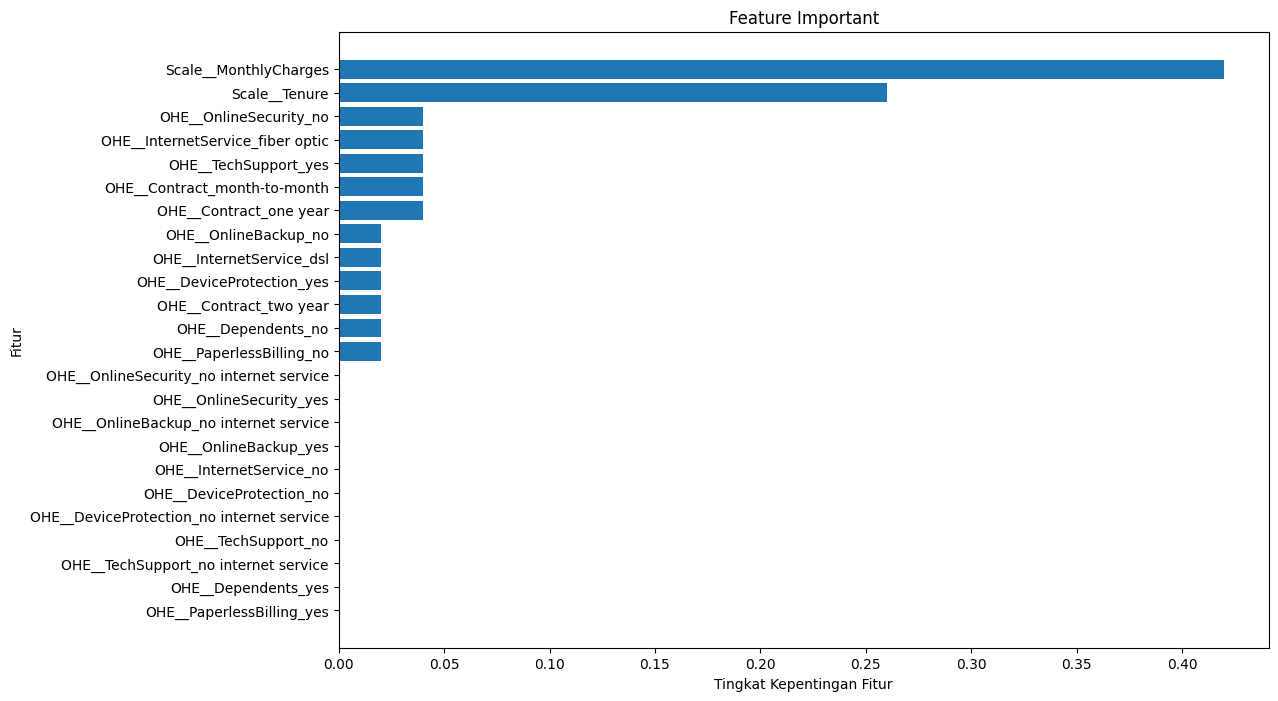

In [67]:
#Feature Important

# Mendapatkan fitur penting dari model final
feature_importance = final_model.named_steps['clf'].feature_importances_

# Mendapatkan nama kolom fitur dari transform1 dalam pipeline
feature_names = final_model.named_steps['Preprocess'].get_feature_names_out()

# Menghasilkan pasangan nama fitur dan nilai pentingnya
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Mengurutkan fitur berdasarkan nilai penting secara menurun
sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Menampilkan fitur
top_features = list(sorted_feature_importance.keys())
top_importance = list(sorted_feature_importance.values())

# Membuat visualisasi
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importance, align='center')
plt.xlabel('Tingkat Kepentingan Fitur')
plt.ylabel('Fitur')
plt.title('Feature Important')
plt.gca().invert_yaxis()  # Mengurutkan fitur dari yang paling penting
plt.show()

Berdasarkan visualisasi diagram, dapat disimpulkan bahwa terdapat 13 fitur yang mempengaruhi model, namun fitur 'MonthlyCharges' dan 'Tenure' merupakan dua fitur dengan tingkat kepentingan yang terbesar dalam pembentukan model final.

#### *Peran Model Terhadap Efisiensi Biaya*

Text(50.722222222222214, 0.5, 'Actual')

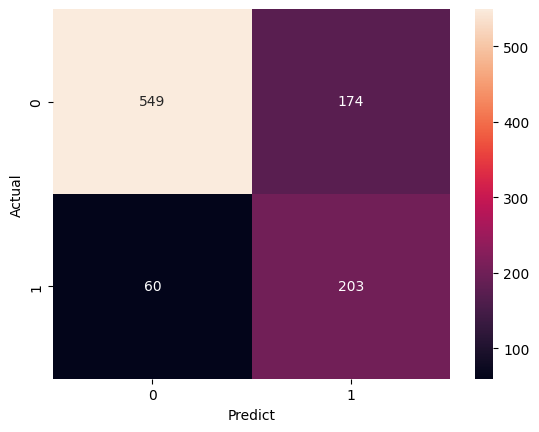

In [68]:
#Menampilkan confussion matrix model final

sns.heatmap(confusion_matrix(ytest,pred_best),annot=True, fmt='g')
plt.xlabel('Predict')
plt.ylabel('Actual')

Berdasarkan confusion matrix pada hasil prediksi model final, diperoleh hasil sebagai berikut:
- Jumlah pelanggan yang sebenarnya churn dan diprediksi churn **(True Positive)**: 203 orang
- Jumlah pelanggan yang sebenarnya churn namun diprediksi tidak churn **(False Negative)**: 60 orang
- Jumlah pelanggan yang sebenarnya tidak churn dan diprediksi tidak churn **(True Negative)**: 549 orang
- Jumlah pelanggan yang sebenarnya tidak churn namun diprediksi churn **(False Positive)**: 174 orang

Berdasarkan asumsi dan referensi, dampak biaya sebagai berikut:
- Biaya retensi per pelanggan = $31,5 per pelanggan (diasumsikan biaya adalah 10% dari CAC)
- Biaya akibat kehilangan pelanggan (CAC) = $315 per pelanggan [(referensi)](https://salesworks.asia/media-centre/blog/customer-acquisition-cost-in-southeast-asia-whats-a-good-benchmark/)
---

**Estimasi biaya tanpa model machine learning:** <br>
Jumlah calon pelanggan untuk dasar perhitungan:
- Calon pelanggan yang menyebabkan keluarnya CAC = 60 + 203 = 263 orang

263 orang x $ 315  per pelanggan
= $82.845

Maka total biaya yang ditanggung bila tidak menggunakan model machine learning adalah **$82.845**

---
**Estimasi biaya dengan model machine learning:** <br>
Jumlah calon pelanggan untuk dasar perhitungan:
- Calon pelanggan yang akan diberikan program retensi = TP + FP = 377 orang
- Calon pelanggan yang menyebabkan keluarnya CAC = FN = 60 orang

(377 orang x $ 31,5 per pelanggan) + (60 orang x $ 315 per pelanggan)
= $ 11.875,5 + $ 18.900 = $30.775,5

Maka total biaya yang ditanggung bila menggunakan model machine learning adalah **$30.775,5**

---
**Total penurunan potential loss** = $ 82.845 - $30.775,5 = $52.069,5

**Persentase penurunan** = $ 52.069,5/ $ 82.845 x 100 = **62,9%**

Berdasarkan data test, model final dapat membantu perusahaan menghindari kerugian **hingga 62,9%**


### *Rekomendasi*

Beberapa langkah yang dapat dilakukan untuk meningkatkan akurasi hasil prediksi dan rekomendasi strategis, yaitu:
- **Memastikan kualitas data**: menyertakan seluruh produk layanan yang ditawarkan oleh perusahaan ke dalam database untuk memastikan bahwa setiap pelanggan setidaknya berlangganan satu layanan. Hal ini untuk menghilangkan kemungkinan pelanggan tanpa layanan yang akhirnya dapat memastikan data lebih akurat dan lebih berkualitas.
- **Menambahkan kolom yang relevan**: menambahkan kolom-kolom baru seperti tingkat kepuasan pelanggan (rating) yang mungkin lebih relevan untuk menggambarkan perilaku pelanggan.
- **Eksplorasi teknik feature engineering dan algoritma lainnya**: selain menggunakan metode feature engineering yang sudah diterapkan, dapat dilakukan eksplorasi lebih luas seperti menggunakan metode scaling dan resampling lainnya.
- **Eksplorasi algoritma lainnya**: dapat diterapkan algoritma klasifikasi lainnya yang dapat memberikan perspektif baru serta membantu untuk mengidentifikasi pola-pola yang mungkin tidak terbaca oleh algoritma yang sudah diterapkan.
- **Optimasi hyperparameter tuning yang lebih kompleks**: melibatkan tahap hyperparameter tuning yang lebih mendalam dengan menggunakan parameter-parameter yang lebih kompleks sehingga dapat membantu untuk meningkatkan performa model secara signifikan.
- **Strategi penyesuaian harga dan analisis pola langganan**: mengingat 'MonthlyCharges' dan 'Tenure' adalah fitur-fitur utama dalam model prediksi ini:
    - Disarankan perusahaan mempertimbangkan penyesuaian harga layanan untuk mengurangi keinginan pelanggan beralih ke pesaing.
    - Perusahaan sebaiknya memeriksa pola perilaku pelanggan berdasarkan durasi langganan dengan lebih cermat.